# Gradient Boosting Trees using Python


#### Step 1: Import standard libraries and modules

In [4]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
os.chdir("/Users/prasanna/Documents/extras/github-projects/python notebooks/Online News Popularity")

In [7]:
news_data = pd.read_csv("OnlineNewsPopularity.csv")

In [8]:
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [9]:
# dimensions of the df
news_data.shape

(39644, 61)

In [10]:
# data types of the variables
print news_data.describe()

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000      

In [11]:
# Seperate target and training features
y = news_data[' shares']
y = pd.Series(y)
X = news_data.drop([' shares','url'],axis = 1)

#### Step 3: Split into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                   random_state = 123)

#It's good practice to stratify your sample by the target variable. 
#This will ensure your training set looks similar to your test set, making your evaluation metrics more reliable

#### Step 4: Data pre-processing
Since features are on different scales, standardizing them by subtracting means and dividing by the standard deviations.

In [33]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

print X_train_scaled.mean(axis=0)
print X_train_scaled.std(axis=0)

[  9.58891032e-17   1.73406930e-16  -1.19189259e-16  -1.56827973e-18
  -8.51351851e-18   1.72510770e-17   1.89313767e-17   2.24039961e-19
   8.06543859e-18  -2.97973148e-17   1.16052700e-16  -1.49210614e-16
   6.72119882e-18   8.06543859e-18  -2.10597563e-17  -5.24253508e-17
  -1.88193567e-17   9.00640643e-17  -5.64580701e-17   4.03271929e-18
   9.49929434e-17   2.77809551e-17  -2.29640960e-16   1.86401247e-16
  -1.49658694e-16  -8.87198245e-17  -3.16344425e-16   2.28520760e-17
   4.12233528e-17  -3.94310331e-17   4.61522319e-17  -3.09175146e-17
  -3.58463937e-17  -1.43385575e-17   3.58463937e-17   3.02453947e-17
  -4.07752729e-17   5.33215107e-17  -1.07987261e-16  -6.49715886e-17
   3.80867933e-17   1.28822977e-16   6.27311890e-18   5.06554351e-16
   6.69879483e-17   1.44281735e-16   1.79231969e-18  -2.81394191e-16
  -1.25462378e-16  -4.23659566e-16  -1.09779581e-16   7.86380262e-17
  -3.31467122e-16  -1.98051325e-16   6.63158284e-17   2.55405555e-17
   1.79231969e-18   4.77205117e-17

In [34]:
# Tranforming the test set using means from the training set
X_test_scaled = scaler.transform(X_test)

print X_test_scaled.mean(axis = 0)
print X_test_scaled.std(axis = 0)

[-0.02502243 -0.00421941  0.02015284 -0.00606497 -0.00579596 -0.00606456
 -0.00252232 -0.0099696   0.00613773 -0.00887598 -0.00408505 -0.01012717
  0.00719427 -0.01907651 -0.00200188  0.0049685  -0.0082003   0.00445631
 -0.03258591  0.01586163  0.01943958  0.01265531  0.02886226  0.02615369
  0.00435483  0.01281415  0.01780455 -0.01504554 -0.01935563 -0.02039538
 -0.00389071  0.00809178 -0.00041899 -0.00058531  0.00079592  0.00287401
 -0.00893594 -0.00468122  0.01474593 -0.01173055  0.00405238  0.0024373
 -0.01074112 -0.02574469 -0.01230275 -0.00083714 -0.00181537 -0.0060137
  0.00146525 -0.0125299  -0.00874494 -0.00260079  0.0026241  -0.00700374
  0.0009064  -0.00072235  0.01372437 -0.00720816 -0.00463801]
[ 0.99515668  0.99117605  1.03714301  0.03528044  0.0294733   0.04282419
  1.01449526  0.96967368  1.01558434  0.97883135  1.01728884  1.01592727
  1.01428663  0.98375235  0.99811918  1.00930441  0.99332446  1.00312195
  0.95998331  1.43791063  1.67849197  1.03689387  0.96086853  1.

In [16]:
# We now fit a Gradient Boosting Tree Model to the data. We use 500 trees where each tree has max depth of 6. 
# The loss function used is the Huber Loss Function

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators':500, 'max_depth':6, 'learning_rate': 0.1, 'loss': 'huber', 'alpha':0.95}
clf = GradientBoostingRegressor(**params).fit(X_train_scaled, y_train)

In [36]:
# Check errors on test data:
mse = mean_squared_error(y_test, clf.predict(X_test_scaled))
r2 = r2_score(y_test, clf.predict(X_test_scaled))

In [37]:
print ("MSE %.4f" %mse)
print ("R2 %.4f" %r2)

MSE 156010467.0867
R2 -0.0186


In [44]:
# Plotting the errors:
# import matplotlib.pyplot as plt

#plt.figure(figsize=(12, 6))
#plt.subplot(1, 1, 1)
#plt.title('Deviance')
#plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
                label='Training Set Deviance')
#plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
#plt.legend(loc='upper right')
#plt.xlabel('Boosting Iterations')
#plt.ylabel('Deviance')


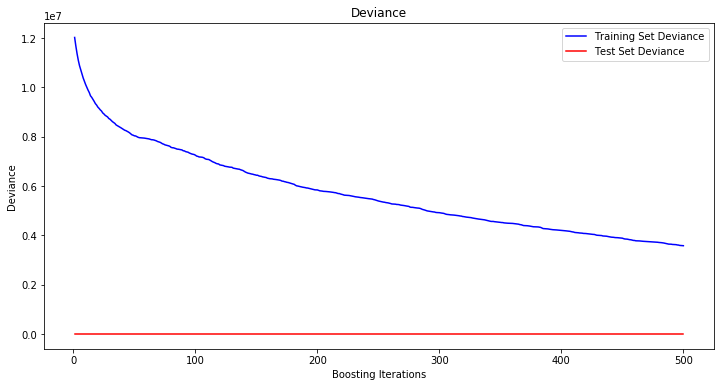

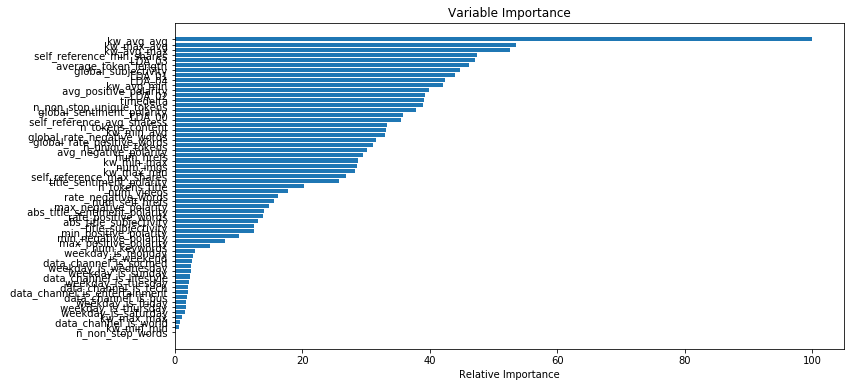

In [45]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


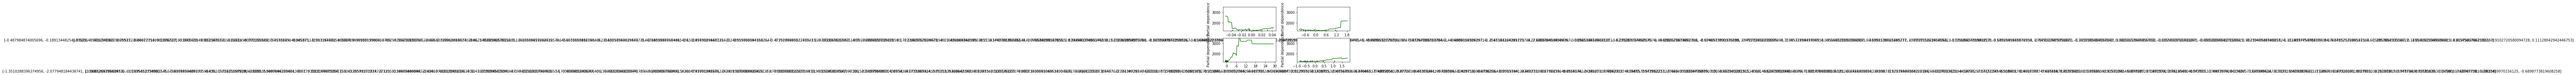

In [55]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, axs = plot_partial_dependence(clf, X_train_scaled, 
                                   features=[3,2,7,6],
                                   feature_names=X_train_scaled,
                                   n_cols=2)
fig
